# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Generating Synthetic Data (generate_data()):

make_blobs: Generating well-separated blob classes (linearly separable data).

make_moons: Generating two interleaving half circles (moons) with added noise.

One dataset is created with higher noise to demonstrate overfitting.

make_circles: Generating a large circle containing a smaller circle in 2D, used to create non-linearly separable data where SVM and KNN should perform better.

The datasets are returned as a list of tuples, each containing the features X and the target labels y.

In [3]:
np.random.seed(42)
 
# Generating synthetic data
def generate_data():

    X1, y1 = make_blobs(n_samples=100, centers=2, random_state=42) #Blobs separated
    
    X2, y2 = make_moons(n_samples=100, noise=0.3, random_state=42) #Overlapping moons for overfitting
    
    X3, y3 = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42) #Non linear separable data to show SVM, KNN are better
    
    X4, y4 = make_moons(n_samples=50, noise=0.1, random_state=42) #combining moons and cicrles
    X4 = np.concatenate([X4, make_circles(n_samples=50, noise=0.1, factor=0.5, random_state=42)[0]])
    y4 = np.concatenate([y4, np.ones(50)])
    
    return [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

Plotting Decision Boundaries (plot_decision_boundaries()):

-> Creating a mesh grid covering the feature space.

-> Using the classifier to predict labels for each point in the mesh grid.

-> Plotting the decision boundaries using contour plots and overlays the training or testing data points.

In [4]:
def plot_decision_boundaries(X, y, classifier, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

Evaluating Classifiers (evaluate_classifiers ()):

-> Iterating over each synthetic dataset.

-> For each dataset, splitting the data into training and testing sets using train_test_split.

-> Iterating over the list of classifiers, fitting each classifier on the training data and evaluating its performance on both the training and testing sets.

-> Plotting the decision boundaries for each classifier on both the training and testing sets.

-> Printing classification reports for both training and testing sets, showing precision, recall, F1-score, and support for each class.

In [5]:
def evaluate_classifiers(datasets):
    classifiers = [
        ("Naive Bayes", GaussianNB()),
        ("Logistic Regression", LogisticRegression()),
        ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
        ("SVM with RBF", SVC(kernel="rbf")),
        ("Decision Tree", DecisionTreeClassifier()),
        ("KNN with K=1", KNeighborsClassifier(n_neighbors=1))
    ]

    for i, (X, y) in enumerate(datasets):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        plt.figure(figsize=(18, 12)) 
        for j, (name, clf) in enumerate(classifiers):
            clf.fit(X_train, y_train)
            score_train = clf.score(X_train, y_train)
            score_test = clf.score(X_test, y_test)

            plt.subplot(len(classifiers), 2, 2 * j + 1)  #training data
            plot_decision_boundaries(X_train, y_train, clf, f"{name} (Train score: {score_train:.2f})")

            plt.subplot(len(classifiers), 2, 2 * j + 2)  #testing data
            plot_decision_boundaries(X_test, y_test, clf, f"{name} (Test score: {score_test:.2f})")

            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            print(f"Dataset {i+1}, {name}:")
            print("Training Classification Report:")
            print(classification_report(y_train, y_pred_train))
            print("Testing Classification Report:")
            print(classification_report(y_test, y_pred_test))
            print("-" * 50)

        plt.tight_layout()
        plt.show()

Main Function (main()):

-> Calls the generate_data function to create the synthetic datasets.

-> Calls the evaluate_classifiers function to evaluate the classifiers and plot the results.

-> Execution: The if name == "main": block ensures that the main function is called only when the script is executed directly, not when imported as a module in another script.

Dataset 1, Naive Bayes:
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        34

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Dataset 1, Logistic Regression:
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00  

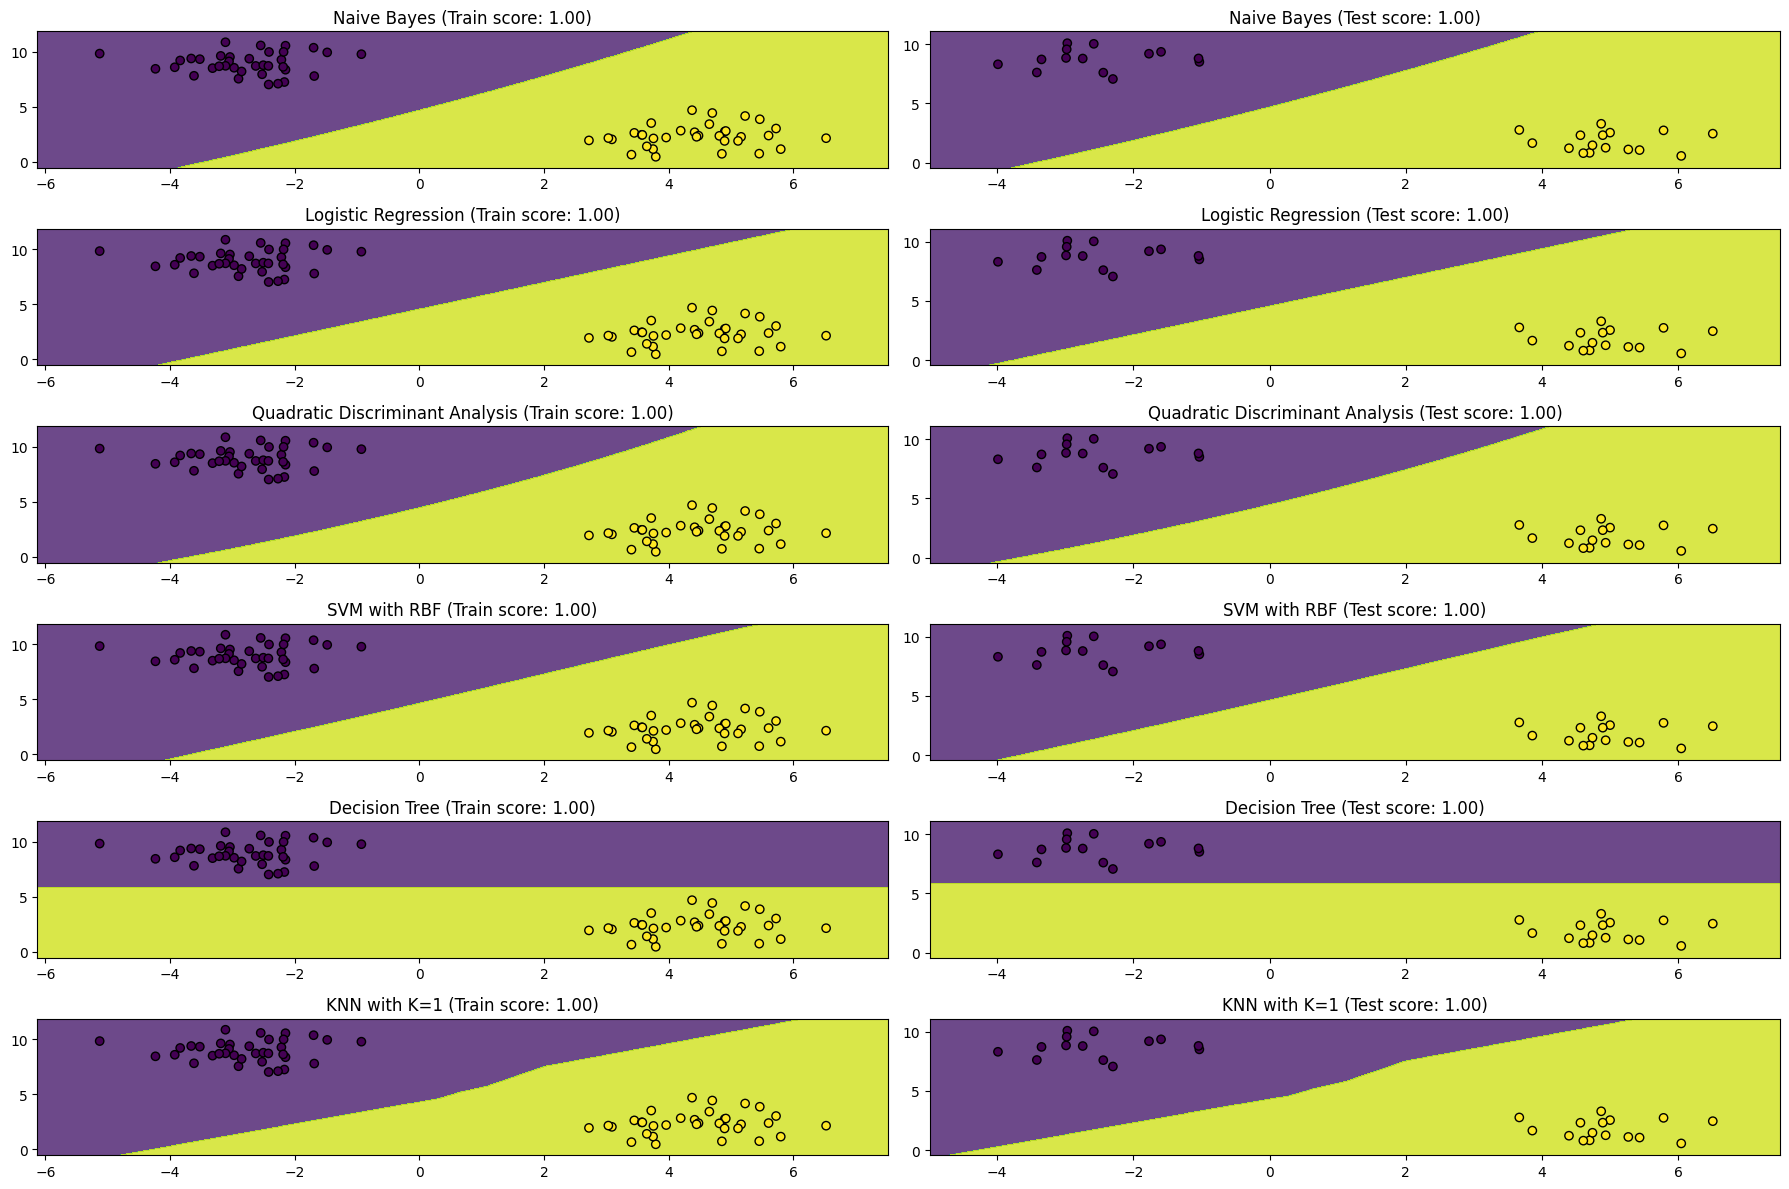

Dataset 2, Naive Bayes:
Training Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.87      0.85      0.86        40

    accuracy                           0.84        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.67      1.00      0.80        10

    accuracy                           0.83        30
   macro avg       0.83      0.88      0.83        30
weighted avg       0.89      0.83      0.84        30

--------------------------------------------------
Dataset 2, Logistic Regression:
Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.88      0.88  

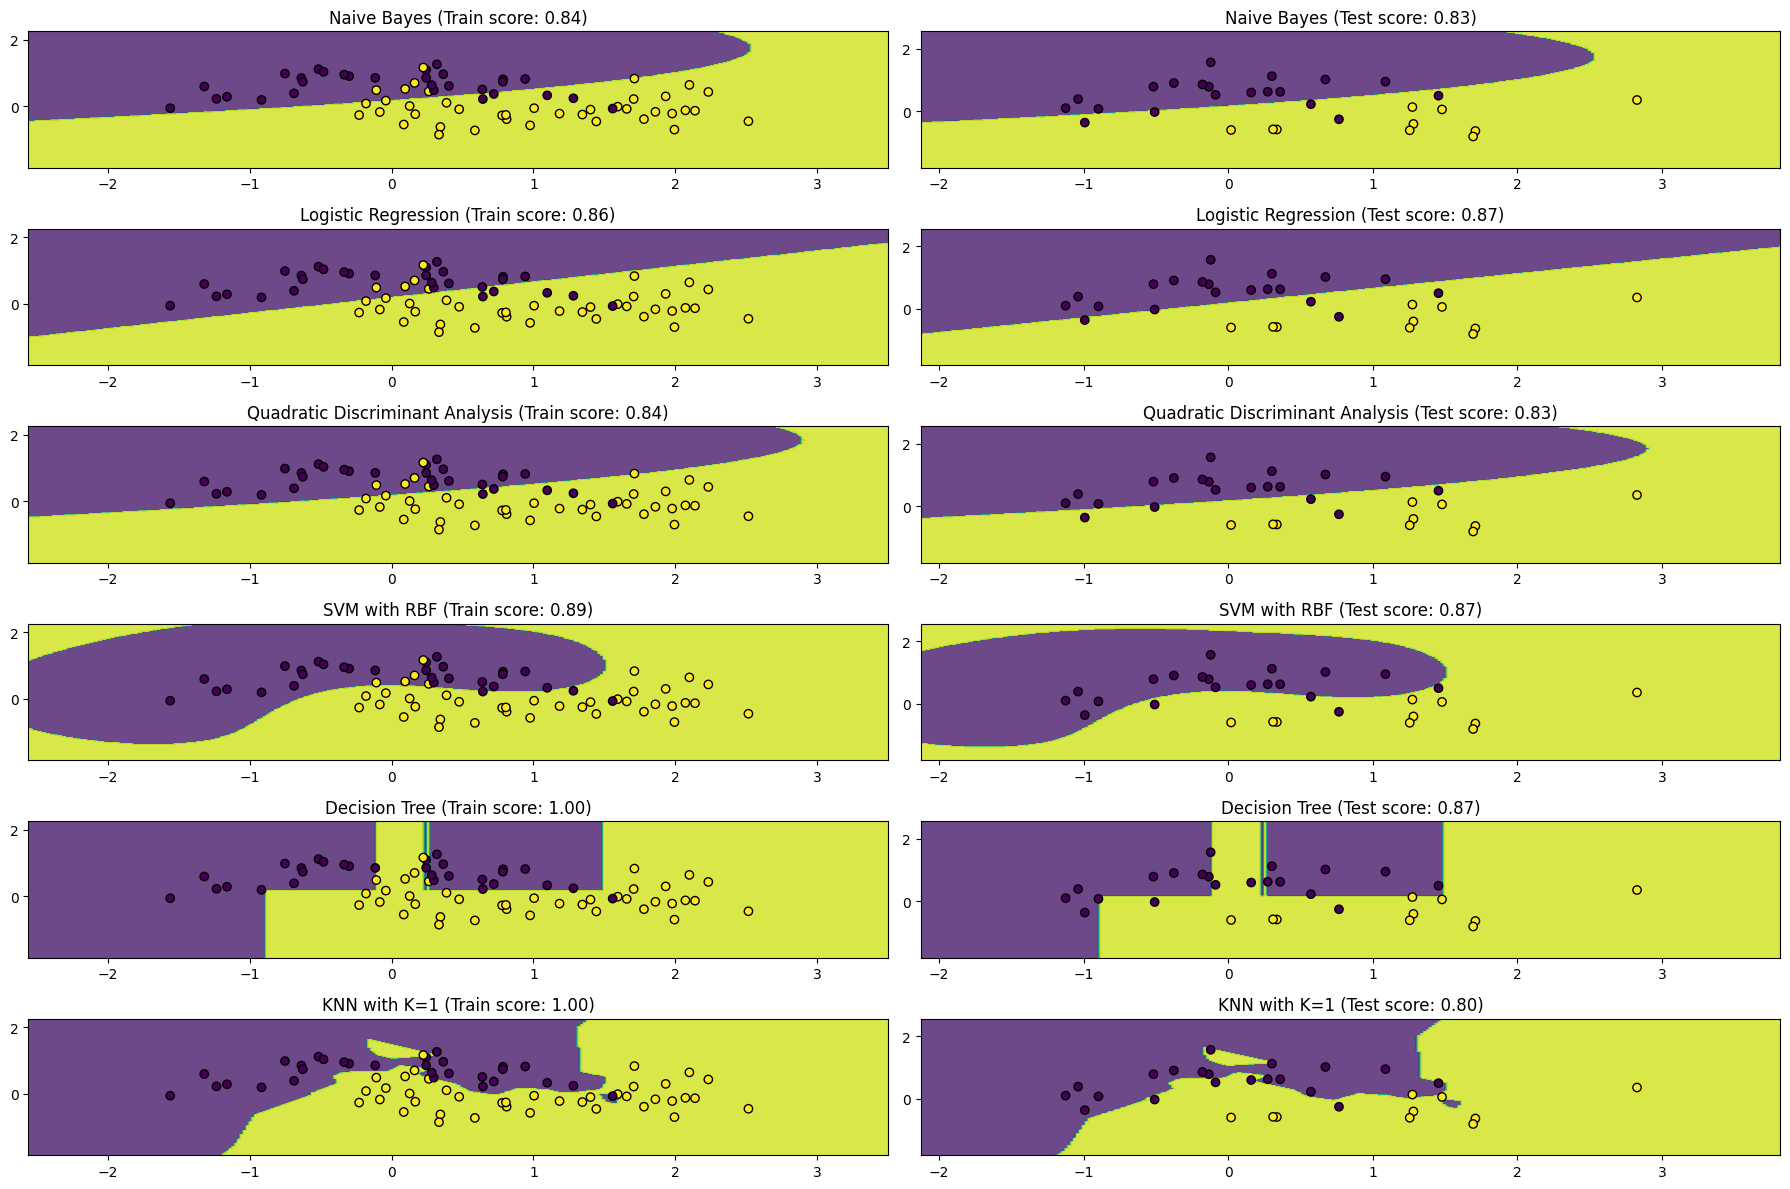

Dataset 3, Naive Bayes:
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.99        40

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

--------------------------------------------------
Dataset 3, Logistic Regression:
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.57      1.00  

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

Dataset 3, SVM with RBF:
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.97        40

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30

--------------------------------------------------
Dataset 3, Decision Tree:
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1

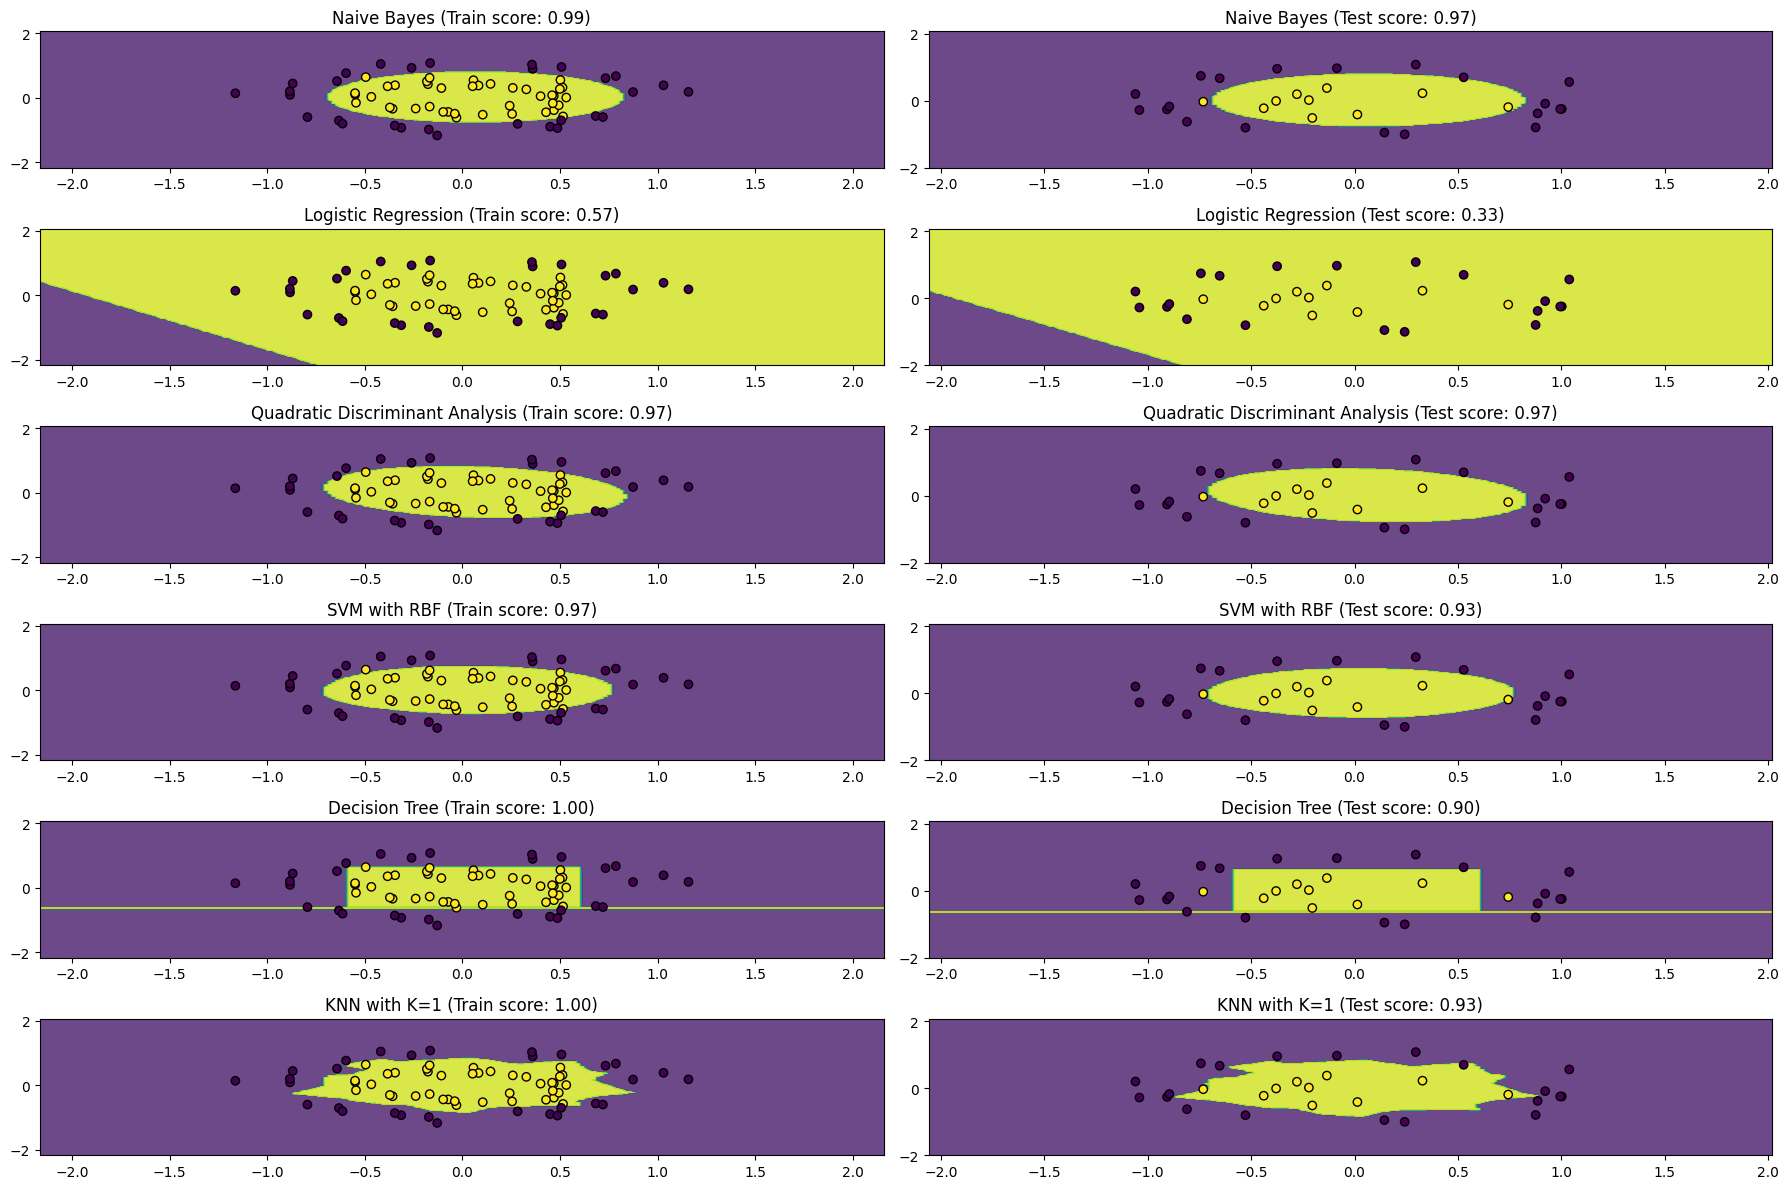

Dataset 4, Naive Bayes:
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.23      0.32        13
         1.0       0.84      0.95      0.89        57

    accuracy                           0.81        70
   macro avg       0.67      0.59      0.60        70
weighted avg       0.78      0.81      0.79        70

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.33      0.47        12
         1.0       0.68      0.94      0.79        18

    accuracy                           0.70        30
   macro avg       0.74      0.64      0.63        30
weighted avg       0.73      0.70      0.66        30

--------------------------------------------------
Dataset 4, Logistic Regression:
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.81      1.00  

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dataset 4, SVM with RBF:
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.81      1.00      0.90        57

    accuracy                           0.81        70
   macro avg       0.41      0.50      0.45        70
weighted avg       0.66      0.81      0.73        70

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.60      1.00      0.75        18

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.38        30
weighted avg       0.36      0.60      0.45        30

--------------------------------------------------
Dataset 4, Decision Tree:
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       1.00      0.98      0

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

Dataset 4, KNN with K=1:
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.98      1.00      0.99        57

    accuracy                           0.99        70
   macro avg       0.99      0.96      0.98        70
weighted avg       0.99      0.99      0.99        70

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.17      0.25        12
         1.0       0.62      0.89      0.73        18

    accuracy                           0.60        30
   macro avg       0.56      0.53      0.49        30
weighted avg       0.57      0.60      0.54        30

--------------------------------------------------


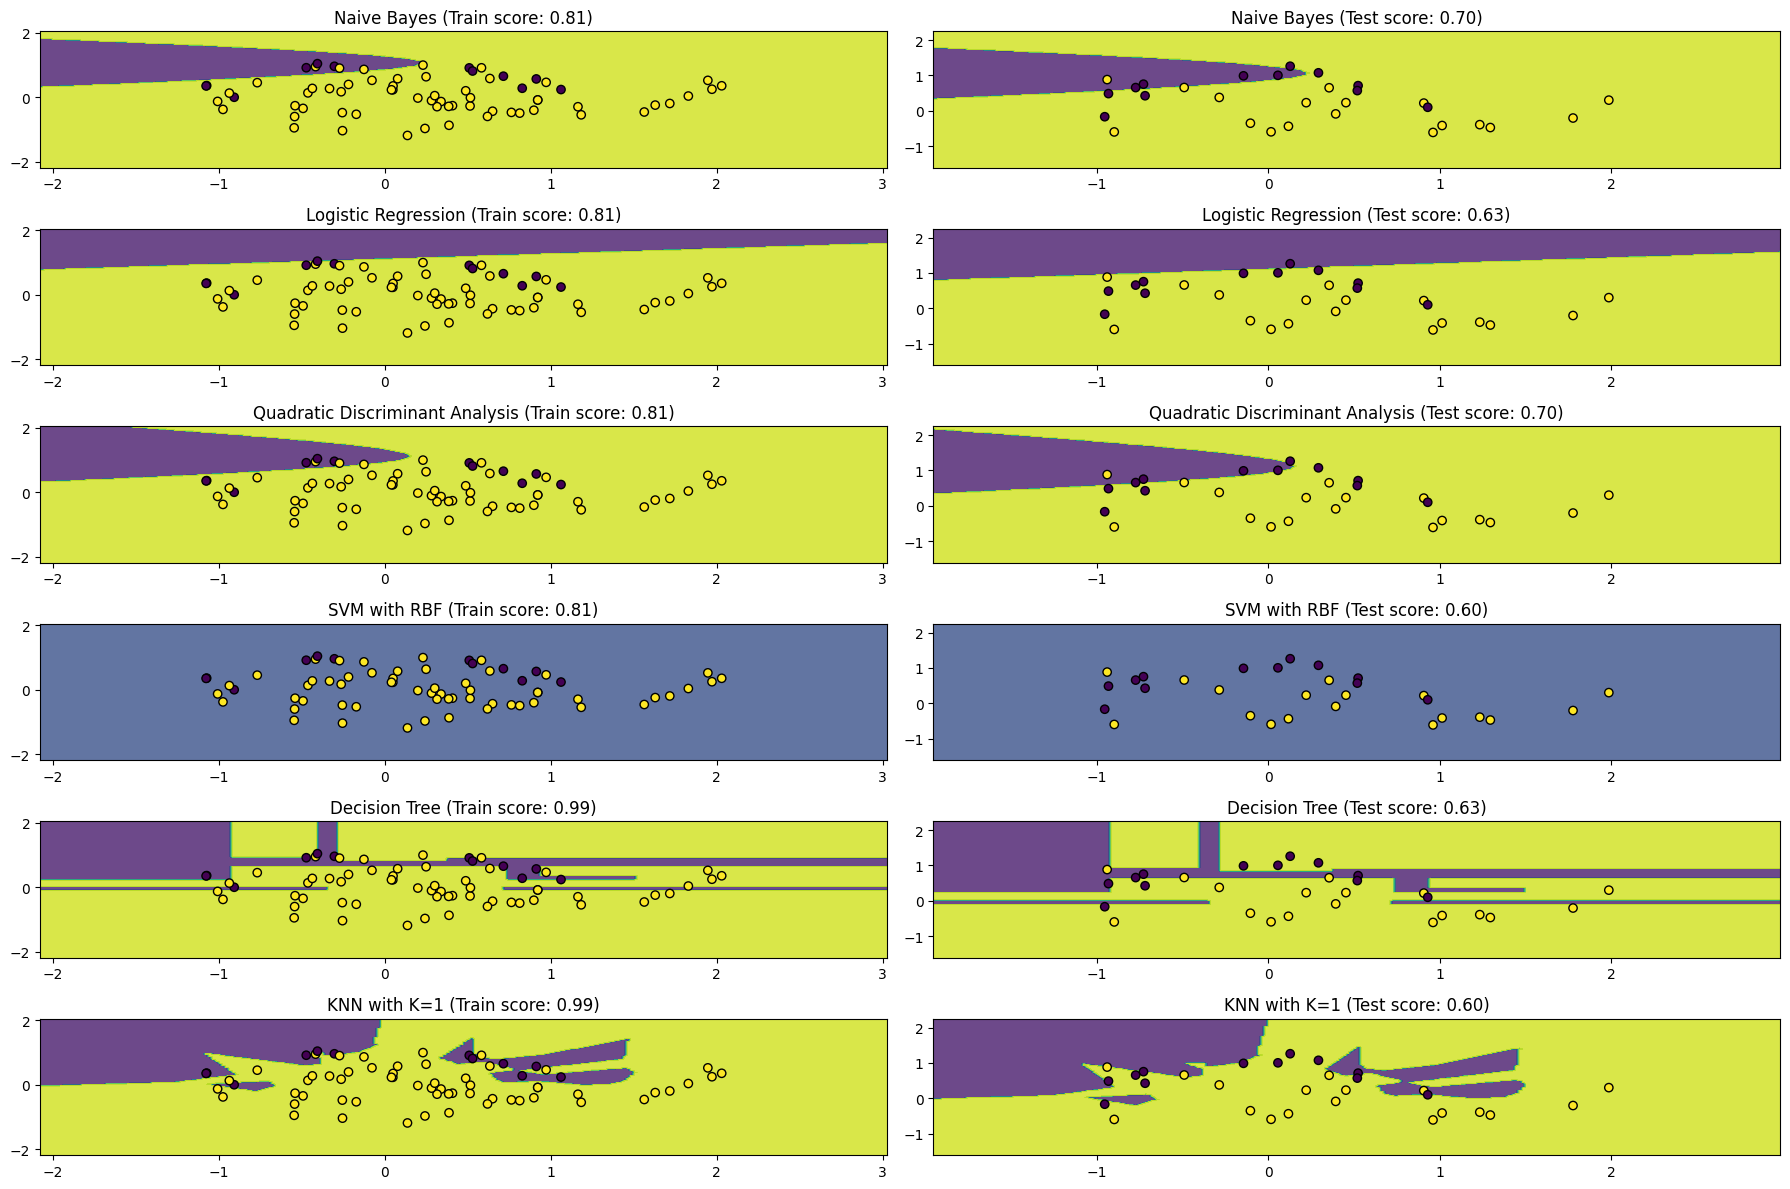

In [6]:
def main():
    datasets = generate_data()
    evaluate_classifiers(datasets)

if __name__ == "__main__":
    main()